In [60]:
from cdlib import algorithms
import community
import joblib
import networkx as nx
import pandas as pd

from community_embedding import swap_dict

# Load data.
graph = nx.read_gpickle("citeseer.pkl")

# Take giant component
graph = graph.subgraph(max(nx.connected_components(graph), key=len))

# Load ground truth.
ground_truth = joblib.load("communities.pkl").to_dict()["label"]

# Do Louvain partition.
louvain = community.best_partition(graph, random_state=42)

# Do Louvain partition.
leiden = dict()
for community, nodes in enumerate(algorithms.leiden(graph).communities):
    for node in nodes:
        leiden[node] = community
        
# Collect result
result = pd.DataFrame(dict(GT=ground_truth, Louvain=louvain, leiden=leiden))

In [105]:
# Report performance.
print(f"Performance Louvain: {nx.algorithms.community.quality.performance(graph, swap_dict(louvain))}")
print(f"Performance Leiden: {nx.algorithms.community.quality.performance(graph, swap_dict(leiden))}")

# Report coverage.
print(f"Coverage Louvain: {nx.algorithms.community.quality.coverage(graph, swap_dict(louvain))}")
print(f"Coverage Leiden: {nx.algorithms.community.quality.coverage(graph, swap_dict(leiden))}")

# Report modularity
print(f"Modularity Louvain: {community.modularity(louvain, graph)}")
print(f"Modularity Leiden: {community.modularity(leiden, graph)}")

Performance Louvain: 0.9552035937207832
Performance Leiden: 0.959571086397108
Coverage Louvain: 0.9173688502310411
Coverage Leiden: 0.9037782005979886
Modularity Louvain: 0.8506472569975961
Modularity Leiden: 0.8530871092300346


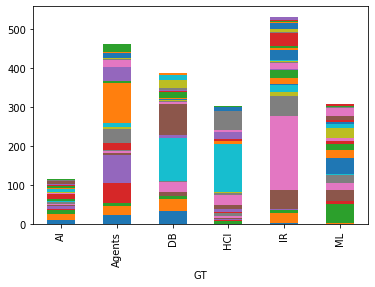

In [89]:
pd.DataFrame(result.groupby("GT")["Louvain"].value_counts()).unstack().plot.bar(stacked=True, legend=False)

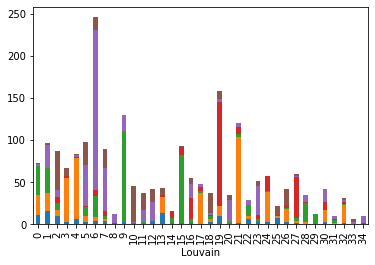

In [85]:
pd.DataFrame(result.groupby("Louvain")["GT"].value_counts()).unstack().plot.bar(stacked=True, legend=False)

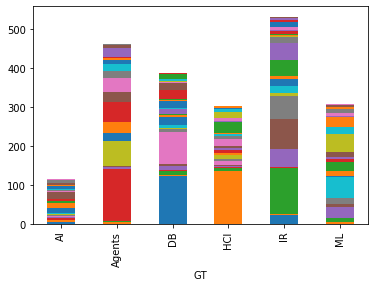

In [86]:
pd.DataFrame(result.groupby("GT")["leiden"].value_counts()).unstack().plot.bar(stacked=True, legend=False)

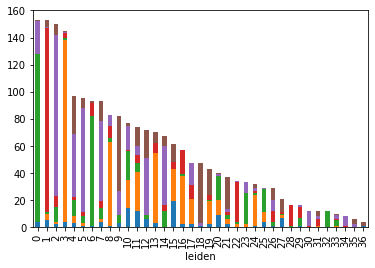

In [87]:
pd.DataFrame(result.groupby("leiden")["GT"].value_counts()).unstack().plot.bar(stacked=True, legend=False)